In [2]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%reload_ext autoreload

In [15]:
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
from FittedModels.AIS_train.train_AIS import AIS_trainer
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.VincentTargets import TwoModes
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
from FittedModels.utils.plotting_utils import plot_distributions

In [16]:
torch.manual_seed(1)
torch.set_default_dtype(torch.float64)
# ******************* Parameters *******************
# using the same as Vincent's code so we have a fair comparison
dim = 2
epochs = int(2e3)
n_samples_estimation = int(1e5)
batch_size = int(512)  # 20
lr = 1e-3
train_prior = False
weight_decay = 1e-2
optimizer = "AdamW"
flow_type = "RealNVP"  # "IAF"
loss_type = "DReG" # "kl"  #    #
initial_flow_scaling = 1.0
n_flow_steps = 30
annealing = True
clip_grad_norm = False
n_plots = 20
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()
#*******************************************************
target = TwoModes(2.0, 0.1)

torch.manual_seed(1)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)

# alpha=2

In [25]:
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_updates_Metropolis=3,
                    noise_scaling=1.0, lr=1e-3, importance_param_lr=1e-3)

In [26]:
tester.AIS_train.noise_scaling

tensor([1.], grad_fn=<ExpBackward>)

loss: -1.880638005659477, mean log p_x -1.4926264464531618:   0%|                                                                                              | 0/100 [00:02<?, ?it/s]

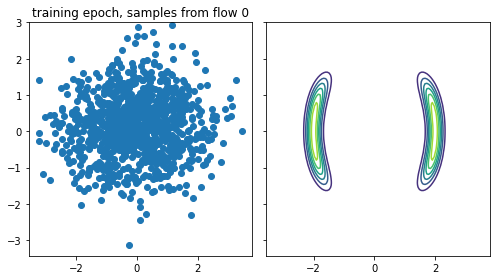

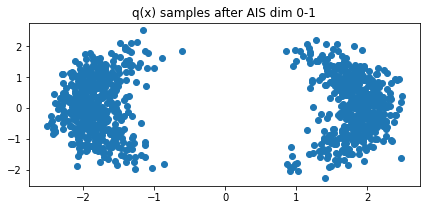

loss: -1.9296868854559899, mean log p_x -1.623530174487795:  10%|████████▌                                                                            | 10/100 [00:30<04:11,  2.80s/it]

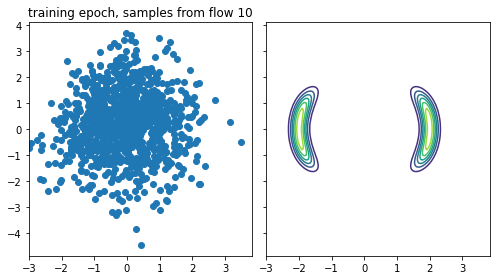

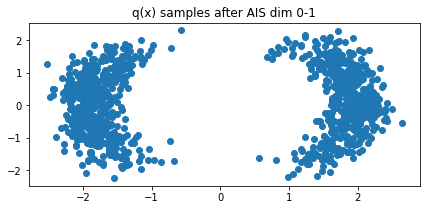

loss: -2.4955655174618703, mean log p_x -1.8837436177790914:  20%|████████████████▊                                                                   | 20/100 [00:56<03:32,  2.65s/it]

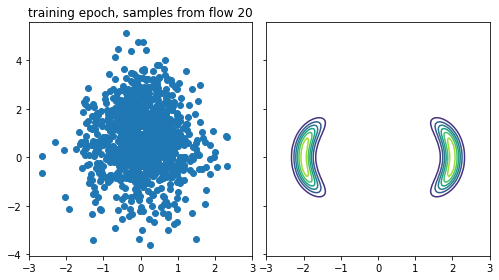

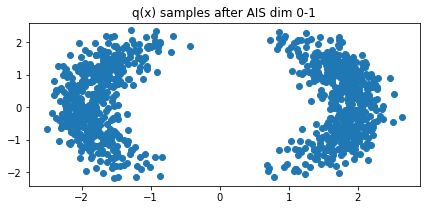

loss: -2.276644950697795, mean log p_x -1.8034782354837264:  30%|█████████████████████████▌                                                           | 30/100 [01:24<03:08,  2.70s/it]

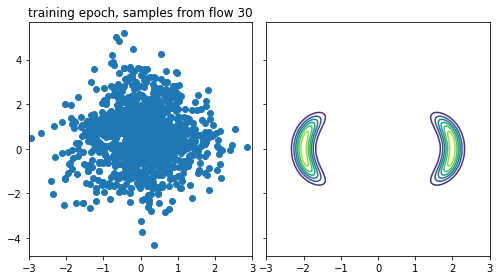

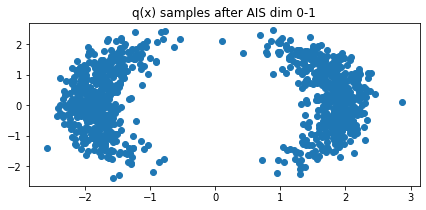

loss: -1.9994348064729328, mean log p_x -1.6472013661671354:  40%|█████████████████████████████████▌                                                  | 40/100 [01:52<02:42,  2.72s/it]

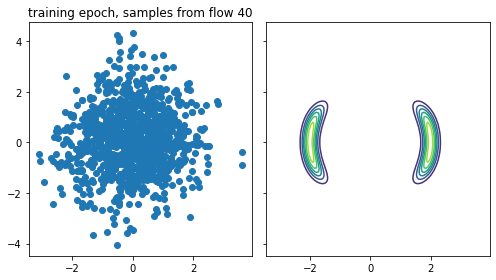

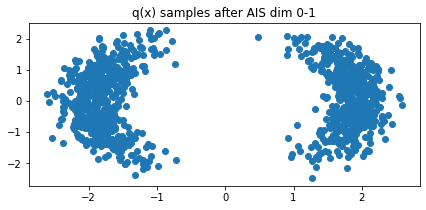

loss: -1.684596931122302, mean log p_x -1.6172416616239997:  50%|██████████████████████████████████████████▌                                          | 50/100 [02:19<02:14,  2.70s/it]

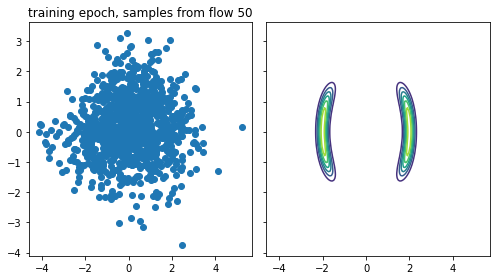

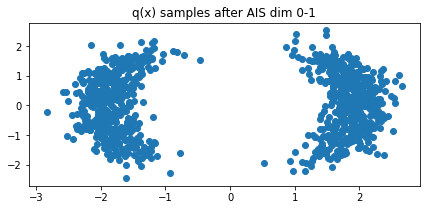

loss: -1.6817188082577172, mean log p_x -1.3772420131190026:  60%|██████████████████████████████████████████████████▍                                 | 60/100 [02:46<01:42,  2.57s/it]

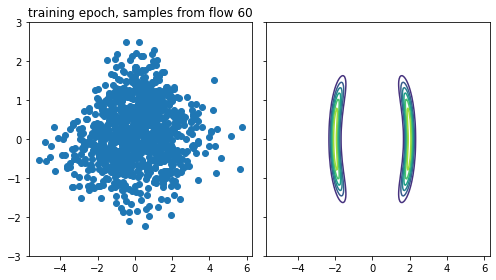

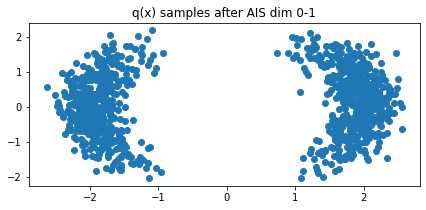

loss: -1.7188623227826383, mean log p_x -1.3536577453147096:  70%|██████████████████████████████████████████████████████████▊                         | 70/100 [03:12<01:18,  2.62s/it]

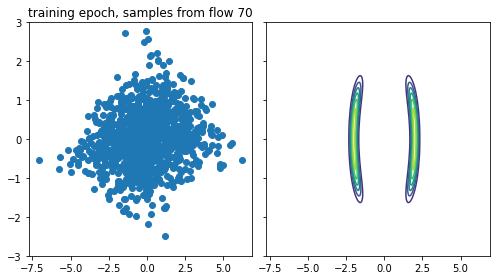

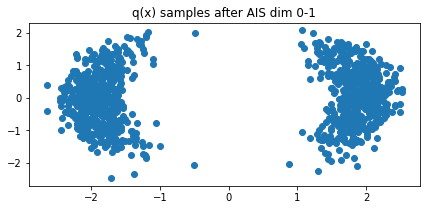

loss: -1.7693803849656726, mean log p_x -1.492853697506768:  80%|████████████████████████████████████████████████████████████████████                 | 80/100 [03:39<00:52,  2.65s/it]

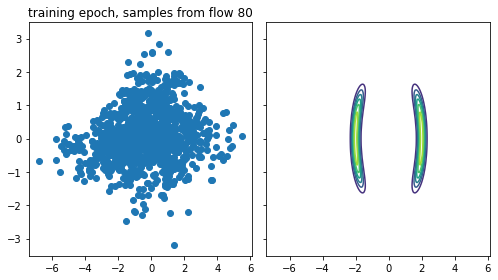

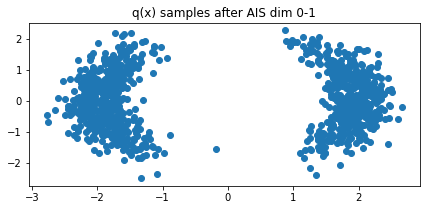

loss: -1.7704553201627462, mean log p_x -1.4160801573150537:  90%|███████████████████████████████████████████████████████████████████████████▌        | 90/100 [04:06<00:26,  2.66s/it]

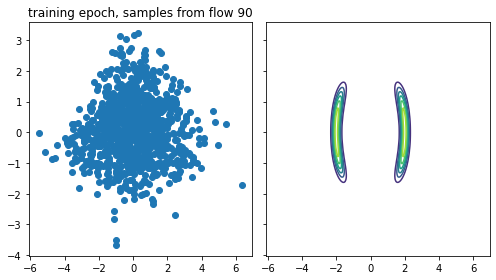

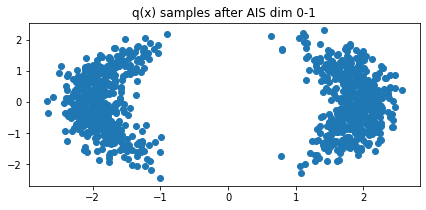

loss: -1.7704553201627462, mean log p_x -1.4160801573150537: 100%|███████████████████████████████████████████████████████████████████████████████████| 100/100 [04:31<00:00,  2.71s/it]


In [27]:
history = tester.train(100, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

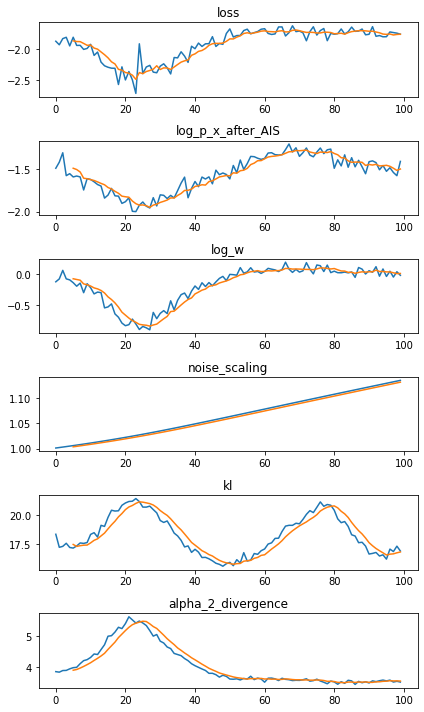

In [28]:
plot_history(history)

loss: -1.7701910452312044, mean log p_x -1.450803556095853:   0%|                                                                                              | 0/300 [00:02<?, ?it/s]

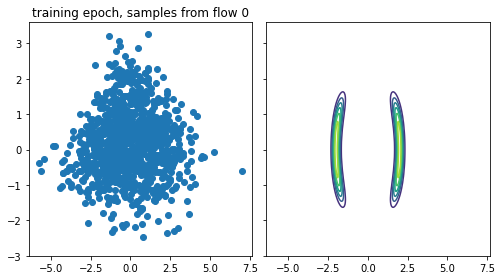

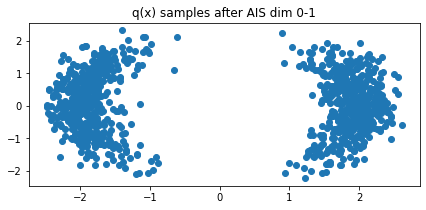

loss: -1.7915423733705091, mean log p_x -1.493802439882139:  10%|████████▌                                                                            | 30/300 [01:23<11:58,  2.66s/it]

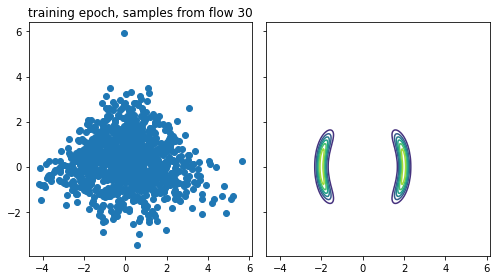

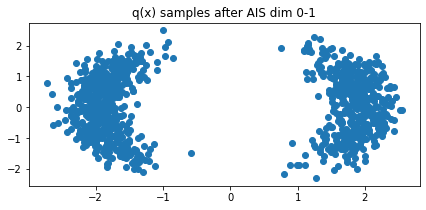

loss: -1.7795285227425404, mean log p_x -1.626010276619725:  20%|█████████████████                                                                    | 60/300 [02:41<10:10,  2.54s/it]

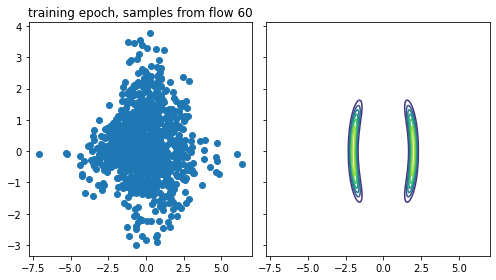

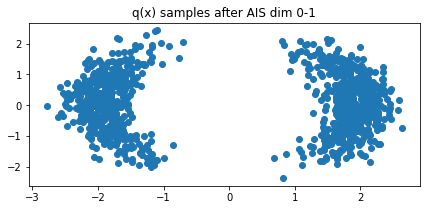

loss: -1.7795285227425404, mean log p_x -1.626010276619725:  24%|████████████████████▍                                                                | 72/300 [03:10<10:03,  2.65s/it]


ValueError: The value argument must be within the support

In [29]:
history = tester.train(300, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

loss: -1.88128417835932, mean log p_x -1.5805408468838016:   0%|                                                                                               | 0/100 [00:02<?, ?it/s]

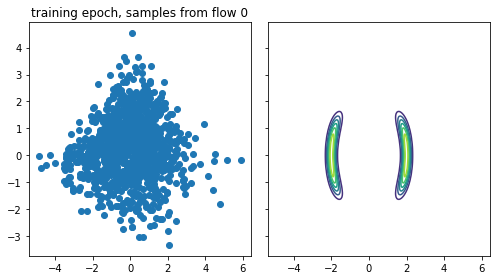

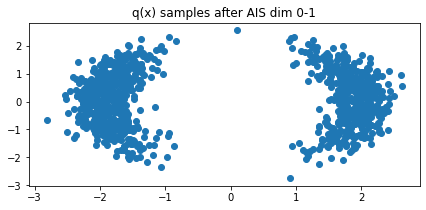

loss: -1.8883648496751104, mean log p_x -1.660935000856866:  10%|████████▌                                                                            | 10/100 [00:31<04:13,  2.82s/it]

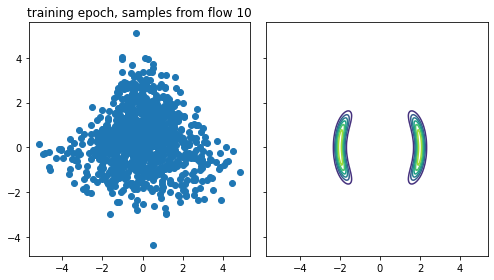

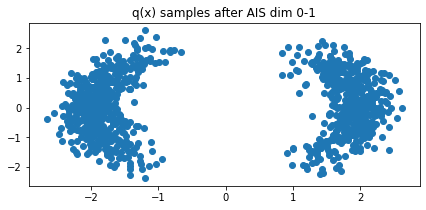

loss: -1.8883648496751104, mean log p_x -1.660935000856866:  20%|█████████████████                                                                    | 20/100 [00:55<03:40,  2.76s/it]


ValueError: The value argument must be within the support

In [31]:
history = tester.train(100, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

In [37]:
import torch.nn as nn
tester.AIS_train.log_noise_scaling = nn.Parameter(torch.tensor([-0.5]).to(tester.device))

loss: -1.8264886904065034, mean log p_x -1.5702075120964099:   0%|                                                                                             | 0/100 [00:02<?, ?it/s]

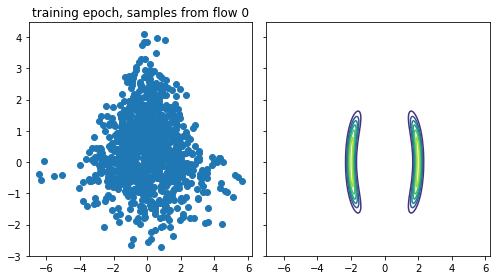

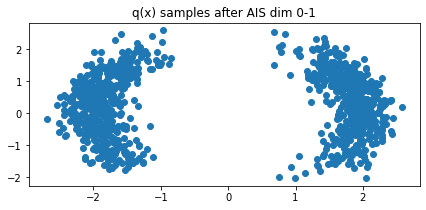

loss: -1.792504213379224, mean log p_x -1.3035086040552997:  10%|████████▌                                                                            | 10/100 [00:27<03:37,  2.42s/it]

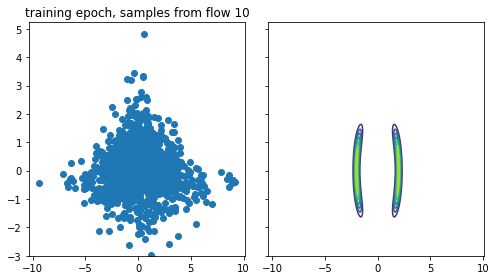

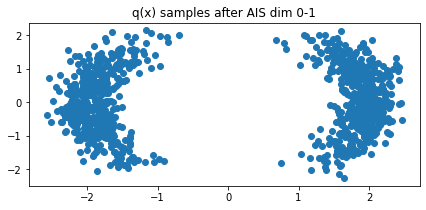

loss: -1.8948185934749144, mean log p_x -1.7567106737054619:  20%|████████████████▊                                                                   | 20/100 [00:51<03:10,  2.38s/it]

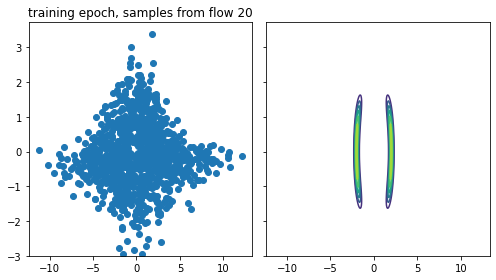

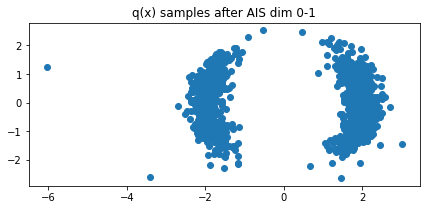

loss: -1.845775095135608, mean log p_x -1.350553258053477:  30%|█████████████████████████▊                                                            | 30/100 [01:16<02:53,  2.48s/it]

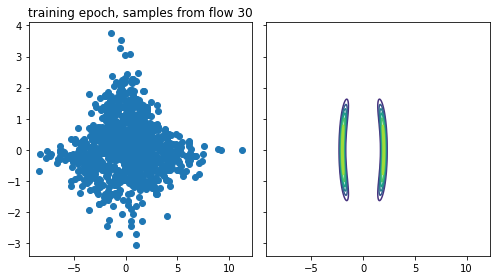

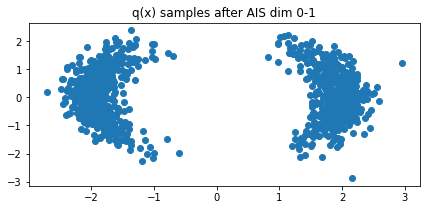

loss: -1.6780200631197695, mean log p_x -1.2796875950380417:  40%|█████████████████████████████████▌                                                  | 40/100 [01:43<02:29,  2.50s/it]

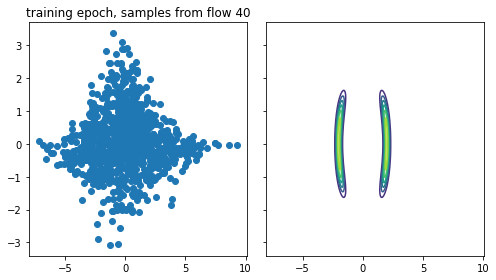

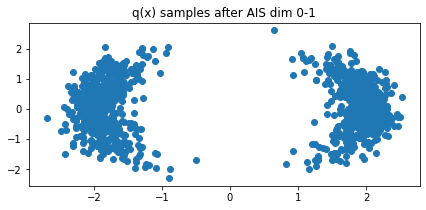

loss: -1.8412476207353232, mean log p_x -1.3461349788813632:  50%|██████████████████████████████████████████                                          | 50/100 [02:08<02:03,  2.47s/it]

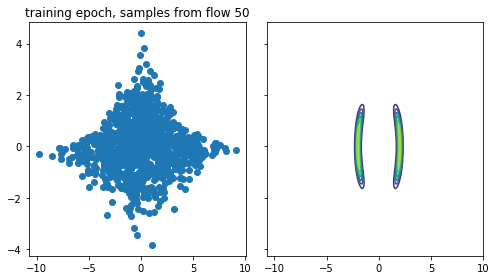

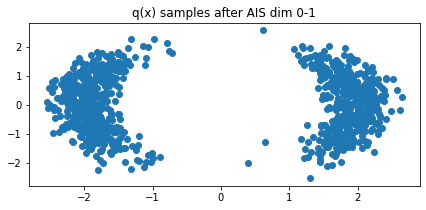

loss: -1.7503167222833593, mean log p_x -1.3670358963895408:  60%|██████████████████████████████████████████████████▍                                 | 60/100 [02:33<01:42,  2.56s/it]

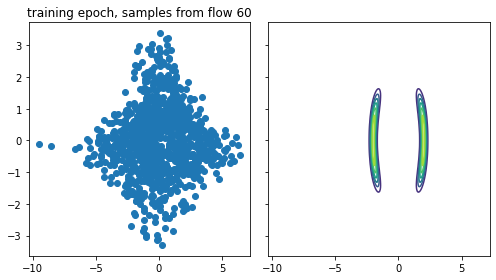

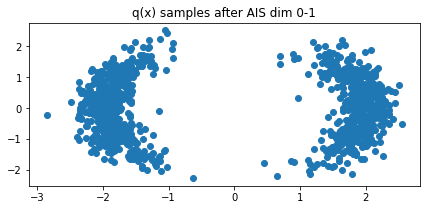

loss: -1.7817018722486948, mean log p_x -1.433333179317175:  70%|███████████████████████████████████████████████████████████▍                         | 70/100 [03:01<01:16,  2.54s/it]

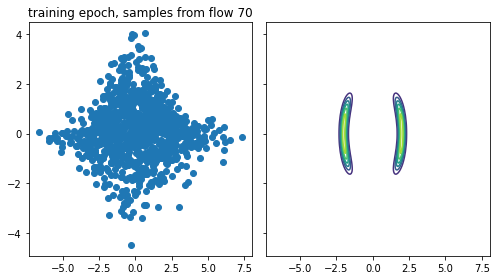

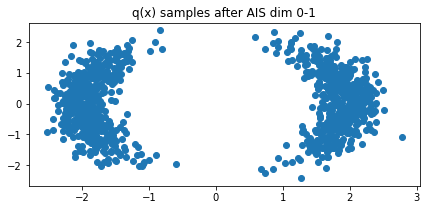

loss: -1.7430525186073194, mean log p_x -1.5088293747723251:  80%|███████████████████████████████████████████████████████████████████▏                | 80/100 [03:27<00:50,  2.54s/it]

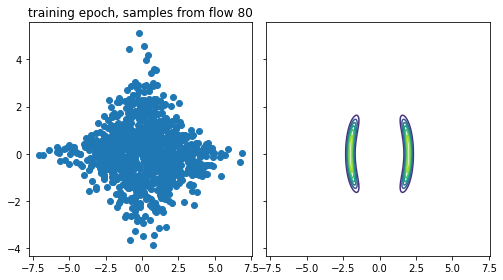

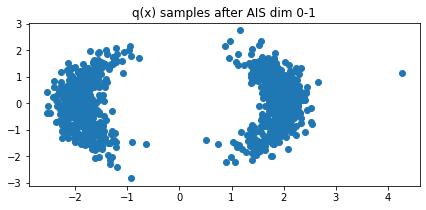

loss: -1.7431133906347052, mean log p_x -1.267895987568201:  90%|████████████████████████████████████████████████████████████████████████████▌        | 90/100 [03:52<00:24,  2.44s/it]

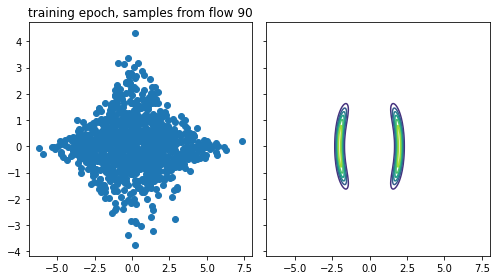

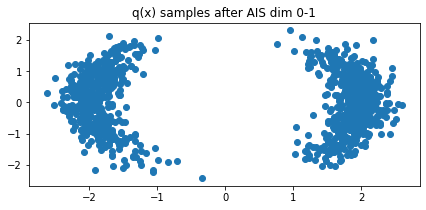

loss: -1.7431133906347052, mean log p_x -1.267895987568201: 100%|████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:15<00:00,  2.55s/it]


In [38]:
history = tester.train(100, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

In [42]:
import torch.nn as nn
tester.AIS_train.log_noise_scaling = nn.Parameter(torch.tensor([-0.5]).to(tester.device))
tester.AIS_train.noise_scaling

tensor([0.6065], grad_fn=<ExpBackward>)

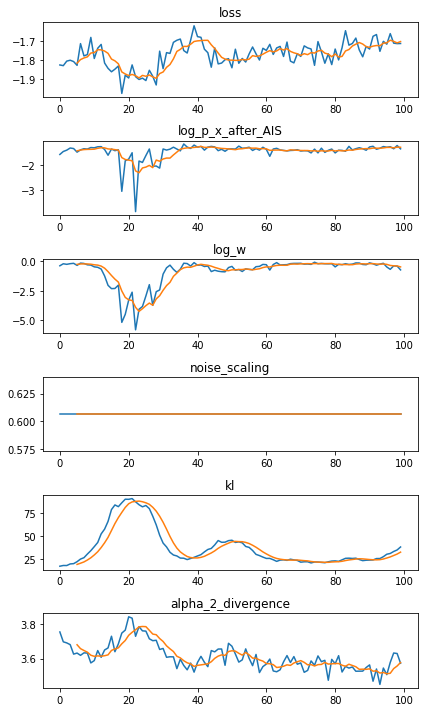

In [40]:
plot_history(history)

loss: -1.7380286986126865, mean log p_x -1.2858988427087976:   0%|                                                                                             | 0/200 [00:02<?, ?it/s]

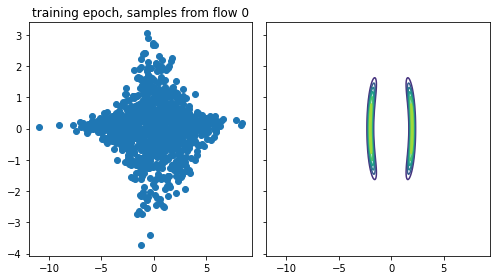

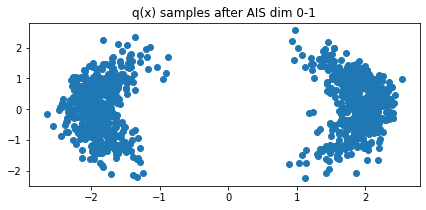

loss: -1.6965038429116004, mean log p_x -1.2646217635333823:  10%|████████▍                                                                           | 20/200 [00:54<07:26,  2.48s/it]

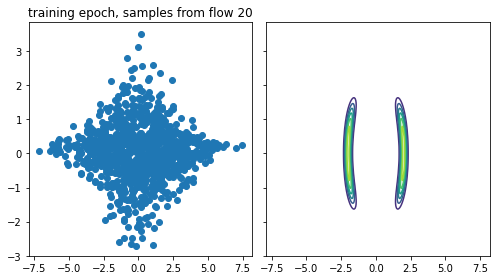

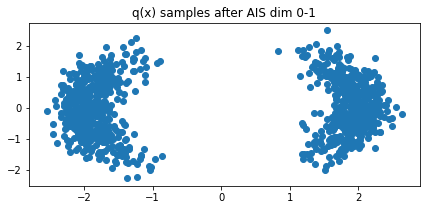

loss: -1.6798101193396966, mean log p_x -1.395955031950871:  20%|█████████████████                                                                    | 40/200 [01:42<06:23,  2.40s/it]

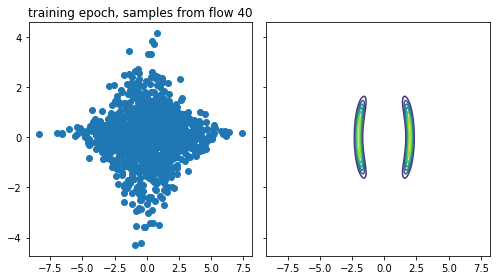

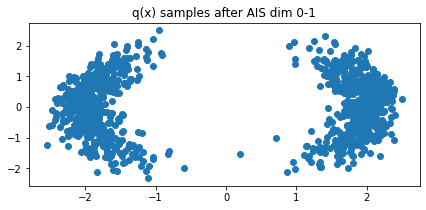

loss: -1.629909748269637, mean log p_x -1.3546854400637183:  30%|█████████████████████████▌                                                           | 60/200 [02:31<05:37,  2.41s/it]

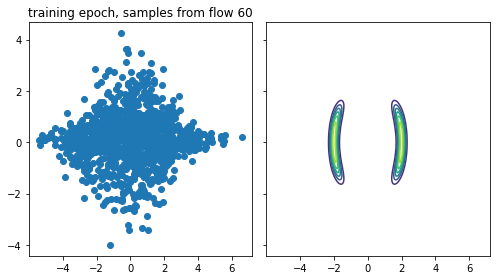

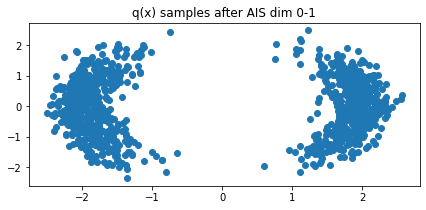

loss: -1.743021983655725, mean log p_x -1.3180241288935595:  40%|██████████████████████████████████                                                   | 80/200 [03:22<05:09,  2.58s/it]

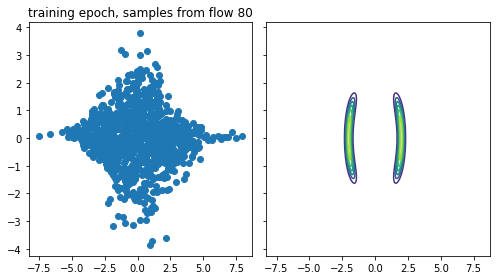

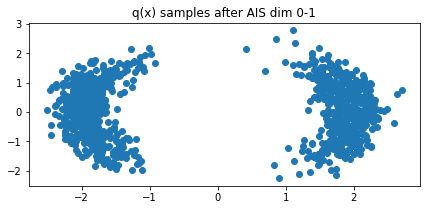

loss: -1.7035744223287046, mean log p_x -1.504620581824341:  50%|██████████████████████████████████████████                                          | 100/200 [04:10<03:53,  2.34s/it]

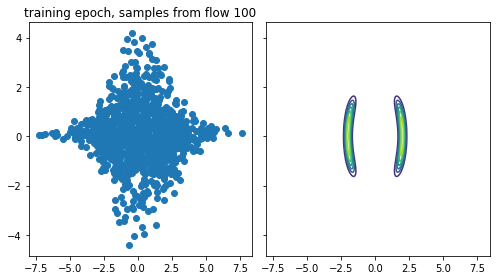

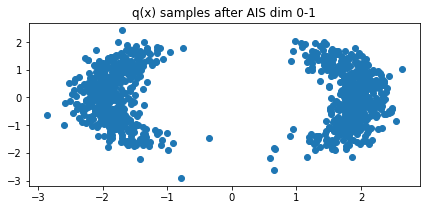

loss: -1.638984407263236, mean log p_x -1.24205271503728:  60%|███████████████████████████████████████████████████▌                                  | 120/200 [04:57<03:05,  2.32s/it]

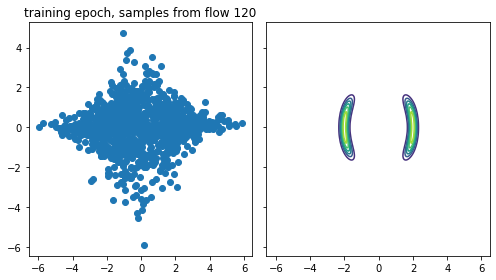

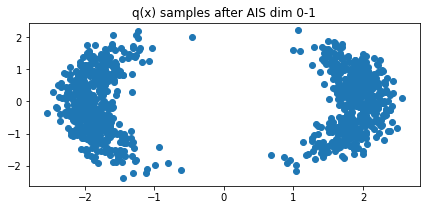

loss: -1.6902708612018271, mean log p_x -1.4079638483453567:  70%|██████████████████████████████████████████████████████████                         | 140/200 [05:44<02:16,  2.28s/it]

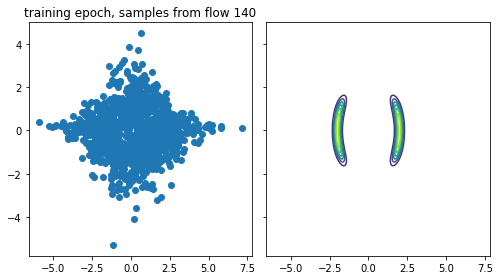

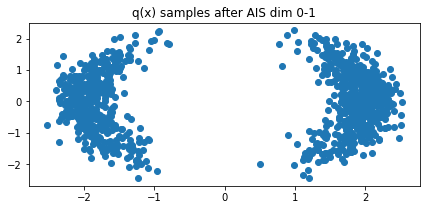

loss: -1.680132088951786, mean log p_x -1.378060571445639:  80%|████████████████████████████████████████████████████████████████████                 | 160/200 [06:33<01:35,  2.38s/it]

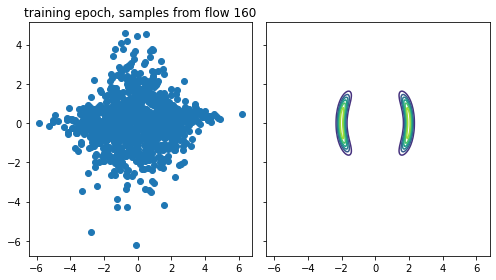

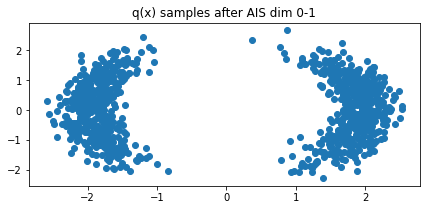

loss: -1.575665340191419, mean log p_x -1.3859982079196609:  90%|███████████████████████████████████████████████████████████████████████████▌        | 180/200 [07:20<00:47,  2.35s/it]

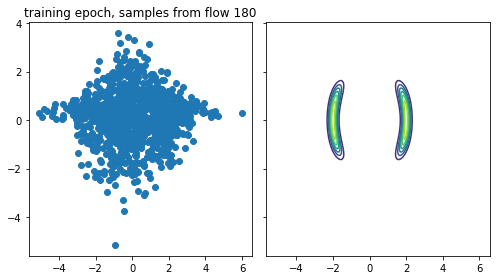

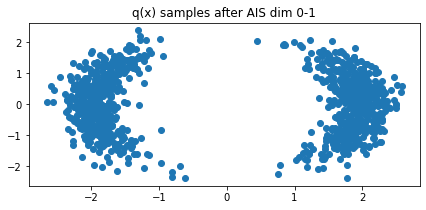

loss: -1.575665340191419, mean log p_x -1.3859982079196609: 100%|████████████████████████████████████████████████████████████████████████████████████| 200/200 [08:06<00:00,  2.43s/it]


In [43]:
history = tester.train(200, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

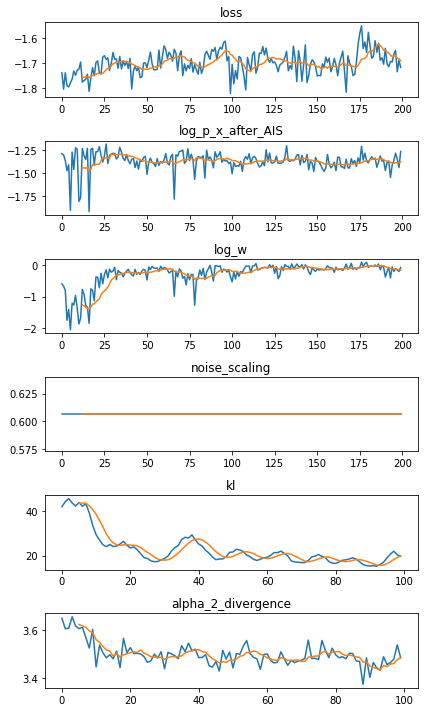

In [44]:
plot_history(history)

loss: -1.6937255387284451, mean log p_x -1.3648286001963816:   0%|                                                                                             | 0/500 [00:02<?, ?it/s]

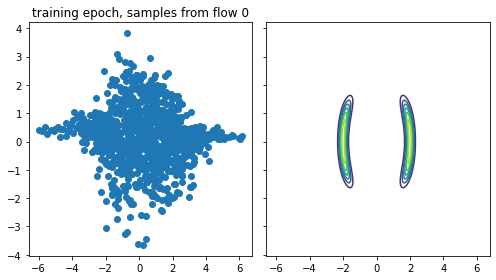

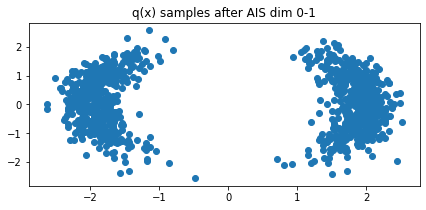

loss: -1.6589729006584135, mean log p_x -1.315158485068315:  10%|████████▌                                                                            | 50/500 [02:00<17:45,  2.37s/it]

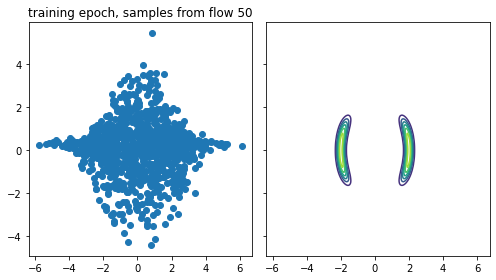

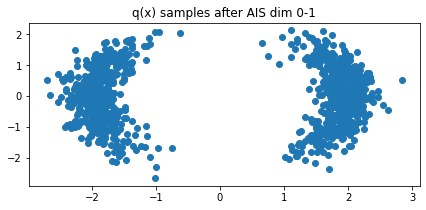

loss: -1.576507403414778, mean log p_x -1.364818970577282:  20%|█████████████████                                                                    | 100/500 [03:57<15:35,  2.34s/it]

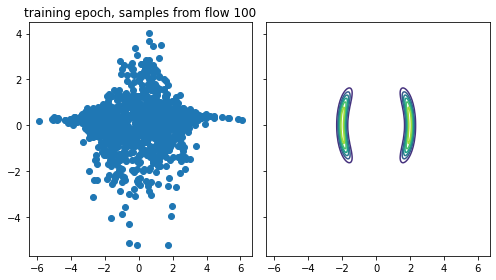

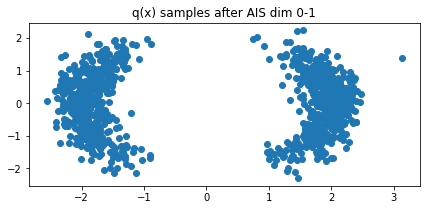

loss: -1.6793003897127647, mean log p_x -1.4207483983429428:  30%|████████████████████████▉                                                          | 150/500 [06:03<16:14,  2.79s/it]

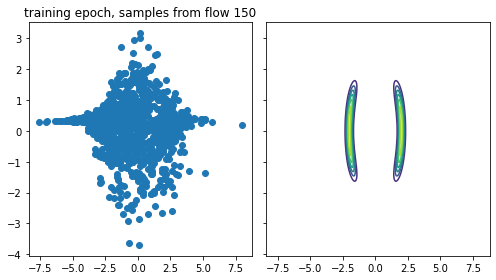

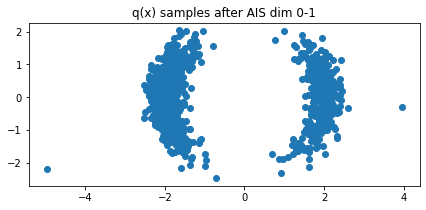

loss: -1.6793003897127647, mean log p_x -1.4207483983429428:  32%|██████████████████████████▏                                                        | 158/500 [06:24<13:52,  2.43s/it]


ValueError: The value argument must be within the support

In [45]:
history = tester.train(500, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

In [47]:
tester.AIS_train.noise_scaling, tester.AIS_train.log_noise_scaling

(tensor([0.6065], grad_fn=<ExpBackward>),
 Parameter containing:
 tensor([-0.5000], requires_grad=True))

In [49]:
import torch.nn as nn
tester.AIS_train.log_noise_scaling = nn.Parameter(torch.tensor([-1.0]).to(tester.device))

loss: -1.8182306372101718, mean log p_x -2.4201005724686286:   0%|                                                                                             | 0/500 [00:02<?, ?it/s]

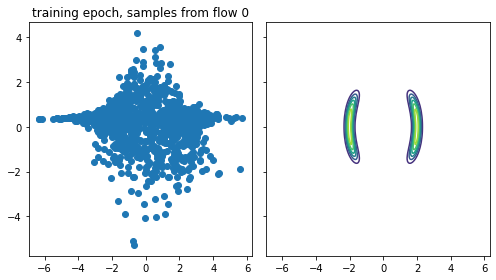

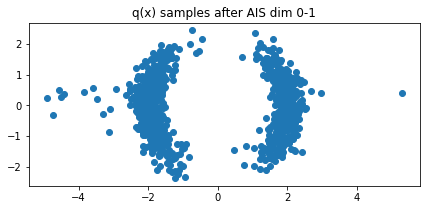

loss: -1.6805361934877345, mean log p_x -1.3850300494933732:  10%|████████▍                                                                           | 50/500 [02:08<19:11,  2.56s/it]

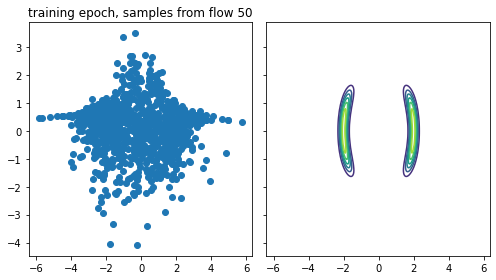

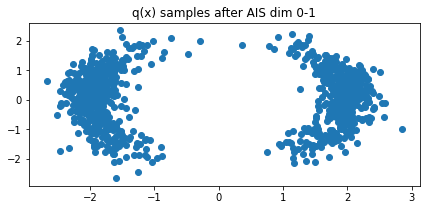

loss: -1.768221488515646, mean log p_x -1.5497968956236559:  20%|████████████████▊                                                                   | 100/500 [04:14<17:01,  2.55s/it]

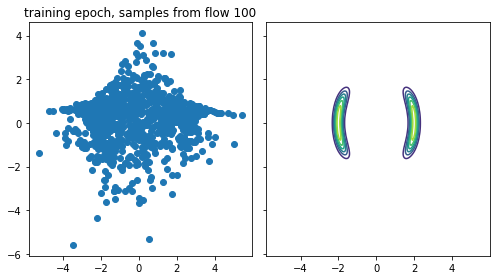

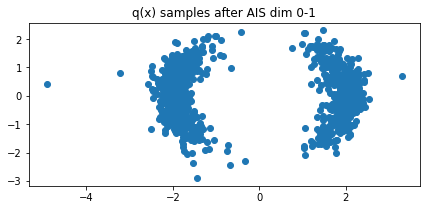

loss: -1.768221488515646, mean log p_x -1.5497968956236559:  23%|███████████████████▋                                                                | 117/500 [04:56<16:11,  2.54s/it]


ValueError: The value argument must be within the support

In [50]:
history = tester.train(500, batch_size=1000, intermediate_plots=True, n_plots=10, plotting_func=plotter)

In [ ]:
plot_history(history)

# New Section